In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
school_pd = pd.read_csv('./clean_datasets/gdi_year_schooling.csv')
pay_pd = pd.read_csv('./clean_datasets/gender-pay-gap-US-2014.csv')
unpaid_work_pd = pd.read_csv('./clean_datasets/unpaid_work.csv')
dv_pd = pd.read_csv('./clean_datasets/domestic_violence.csv')
abortion_pd = pd.read_csv('./clean_datasets/abortion_and_health.csv')

In [15]:
school_pd.sort_values(by='GDI', ascending=True, inplace=True)
school_pd.rename(columns={
    'Mean Year of Schooling-Female': 'year-female',
    'Mean Year of Schooling-Male': 'year-male'
}, inplace=True)
school_pd.drop(['Expected Year of Schooling-Female', 'Expected Year of Schooling-Male'], axis=1, inplace=True)
school_pd['percentage_gap'] = (school_pd['year-female'] - school_pd['year-male'])

# Sort the DataFrame by the percentage gap
school_pd.sort_values(by='percentage_gap', ascending=True, inplace=True)


In [17]:
school_pd.sort_values(by='percentage_gap', ascending=True, inplace=True)

school_pd.head(10)

,Country,GDI,year-female,year-male,percentage_gap
144,Togo,0.849,3.4,6.8,-3.4
159,Congo (Democratic Republic of the),0.885,5.6,8.5,-2.9
152,Senegal,0.874,1.6,4.5,-2.9
101,Gabon,0.908,7.8,10.5,-2.7
134,Cameroon,0.885,4.8,7.5,-2.7
131,Angola,0.903,4.2,6.9,-2.7
157,Guinea-Bissau,0.867,2.4,4.9,-2.5
98,South Africa,0.944,9.7,12.2,-2.5
168,Central African Republic,0.810,3.1,5.6,-2.5
158,Liberia,0.871,3.9,6.3,-2.4


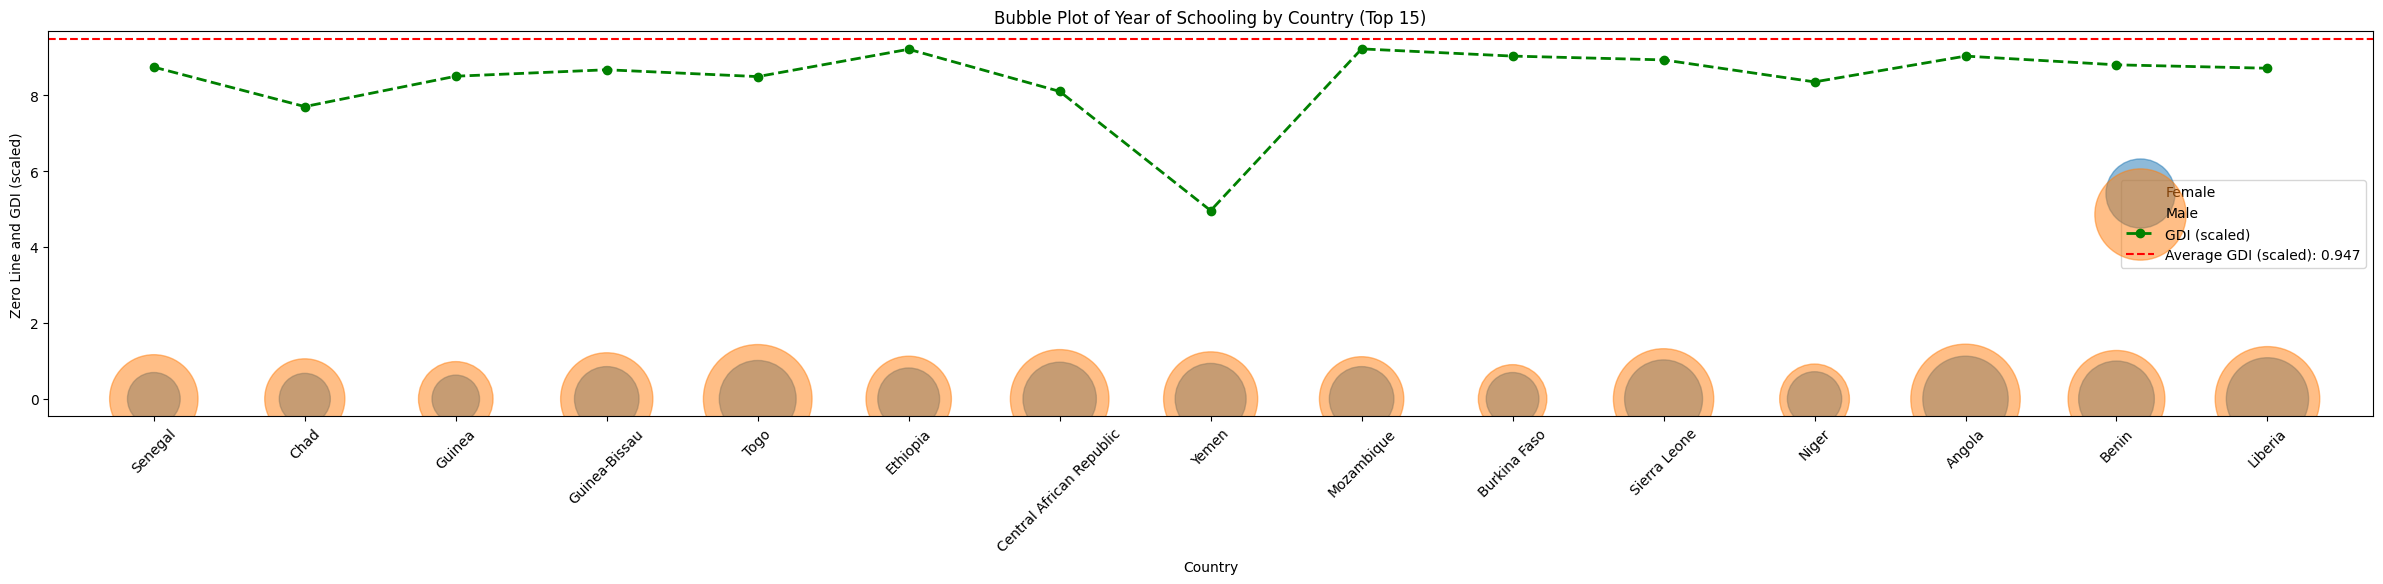

In [41]:
average_gdi = school_pd['GDI'].mean()

plt.figure(figsize=(30, 5))
countries = school_pd['Country'][:15]

female_diameter = np.sqrt(school_pd['year-female'][:15]) * 30  
male_diameter = np.sqrt(school_pd['year-male'][:15]) * 30

plt.scatter(countries, [0]*15, s=female_diameter**2, alpha=0.5, label='Female')
plt.scatter(countries, [0]*15, s=male_diameter**2, alpha=0.5, label='Male')

plt.plot(countries, school_pd['GDI'][:15]*10, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=6, label='GDI (scaled)')
plt.axhline(y=average_gdi*10, color='r', linestyle='--', label=f'Average GDI (scaled): {average_gdi:.3f}')

plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Zero Line and GDI (scaled)')
plt.title('Bubble Plot of Year of Schooling by Country (Top 15)')
plt.legend()
plt.show()


In [42]:
school_pd.to_csv('./website/data/true/school.csv', index=False)

In [82]:
pay_pd = pay_pd.groupby("Category").mean()[["Women average annual salary ($)", "Men average annual salary ($)"]]
pay_pd["Pay gap ($)"] = pay_pd["Men average annual salary ($)"] - pay_pd["Women average annual salary ($)"]
pay_pd["Pay gap as a percentage"] = (pay_pd["Pay gap ($)"] / pay_pd["Men average annual salary ($)"]) * 100


/var/folders/d4/59rv6l4d4ss8st5m27_1b6nw0000gn/T/ipykernel_20909/3676464761.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pay_pd = pay_pd.groupby("Category").mean()[["Women average annual salary ($)", "Men average annual salary ($)"]]


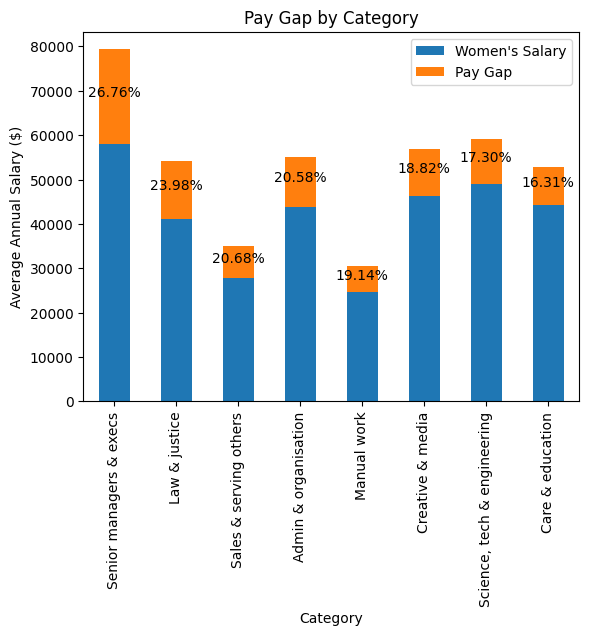

In [83]:
pay_pd.columns = ['WomenSalary', 'MenSalary', 'PayGap', 'PayGapPct']
pay_pd.index = pay_pd.index.str.capitalize()
pay_pd.sort_values('PayGapPct', ascending=False, inplace=True)

fig, ax = plt.subplots()
pay_pd[['WomenSalary', 'PayGap']].plot(kind='bar', stacked=True, ax=ax)

for idx, value in enumerate(pay_pd['PayGapPct']):
    ax.text(idx, pay_pd['WomenSalary'][idx] + pay_pd['PayGap'][idx] / 2, f'{value:.2f}%', ha='center')

plt.title('Pay Gap by Category')
plt.xlabel('Category')
plt.ylabel('Average Annual Salary ($)')
plt.legend(["Women's Salary", 'Pay Gap'])
plt.show()


In [84]:
# Create a copy of the original DataFrame
pay_pd_false = pay_pd.copy()

# Reduce the pay gap by 10% by increasing women's salaries
pay_pd_false['WomenSalary'] = pay_pd_false['WomenSalary'] + (pay_pd_false['PayGap'] * 0.3)

# Recalculate the absolute pay gap and the pay gap percentage
pay_pd_false['PayGap'] = pay_pd_false['MenSalary'] - pay_pd_false['WomenSalary']
pay_pd_false['PayGapPct'] = (pay_pd_false['PayGap'] / pay_pd_false['MenSalary']) * 100

pay_pd_false


,WomenSalary,MenSalary,PayGap,PayGapPct
Category,,,,
Senior managers & execs,64469.580000,79328.900000,14859.320000,18.731282
Law & justice,45078.337500,54169.500000,9091.162500,16.782807
Sales & serving others,29971.923077,35043.692308,5071.769231,14.472702
Admin & organisation,47205.580000,55148.900000,7943.320000,14.403406
Manual work,26381.145455,30461.636364,4080.490909,13.395508
Creative & media,49498.775000,57009.250000,7510.475000,13.174134
"Science, tech & engineering",51989.592308,59154.307692,7164.715385,12.111908
Care & education,46795.300000,52826.818182,6031.518182,11.417531


In [85]:
pay_pd.to_csv('./website/data/true/pay.csv', index=True)
pay_pd_false.to_csv('./website/data/false/pay.csv', index=True)

In [21]:
unpaid_work_pd.rename(columns={
    'Time spent in paid work, by sex_MEN': 'Paid_Men',
    'Time spent in paid work, by sex_WOMEN': 'Paid_Women',
    'Time spent in total work, by sex_MEN': 'Total_Men',
    'Time spent in total work, by sex_WOMEN': 'Total_Women',
    'Time spent in unpaid work, by sex_MEN': 'Unpaid_Men',
    'Time spent in unpaid work, by sex_WOMEN': 'Unpaid_Women'
}, inplace=True)


In [26]:
unpaid_work_pd['Unpaid_Work_Pct_Diff'] = ((unpaid_work_pd['Unpaid_Women'] - unpaid_work_pd['Unpaid_Men']) / unpaid_work_pd['Unpaid_Men']) * 100
unpaid_work_pd['Unpaid_Work_Abs_Diff'] = (unpaid_work_pd['Unpaid_Women'] - unpaid_work_pd['Unpaid_Men'])
unpaid_work_pd['total_diff'] = (unpaid_work_pd['Total_Women'] - unpaid_work_pd['Total_Men'])


unpaid_work_pd.sort_values('Unpaid_Work_Abs_Diff', ascending=False, inplace=True)

unpaid_work_pd['total_diff'].mean()


29.94411764705882

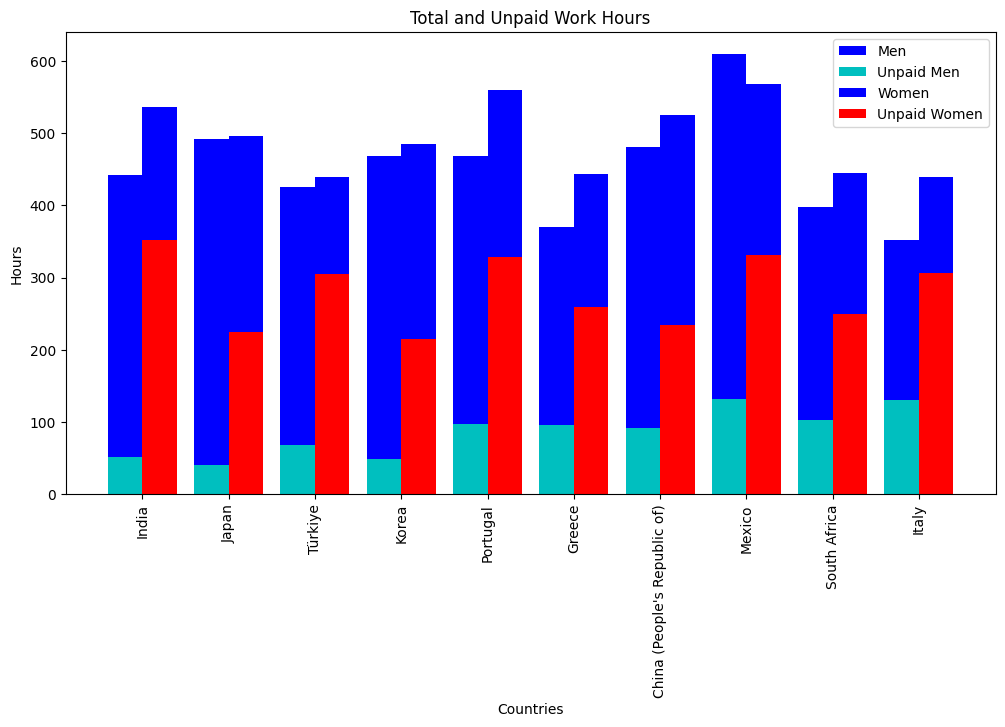

In [66]:
unpaid_work_pd['Unpaid_Work_Pct_Diff'] = ((unpaid_work_pd['Unpaid_Women'] - unpaid_work_pd['Unpaid_Men']) / unpaid_work_pd['Unpaid_Men']) * 100
unpaid_work_pd.sort_values('Unpaid_Work_Pct_Diff', ascending=False, inplace=True)
unpaid_work_pd = unpaid_work_pd.head(10)

countries = unpaid_work_pd['Country']
barWidth = 0.35
x = np.arange(len(countries))

r1 = np.arange(len(countries))
r2 = [x + barWidth for x in r1]

plt.figure(figsize=(12, 6))


plt.bar(x - 0.2, unpaid_work_pd['Total_Men'], 0.4, label='Men', color='b')
plt.bar(x - 0.2, unpaid_work_pd['Unpaid_Men'], 0.4, label='Unpaid Men', color='c')

plt.bar(x + 0.2, unpaid_work_pd['Total_Women'], 0.4, label='Women', color='b')
plt.bar(x + 0.2, unpaid_work_pd['Unpaid_Women'], 0.4, label='Unpaid Women', color='r')

plt.xlabel('Countries')
plt.ylabel('Hours')
plt.title('Total and Unpaid Work Hours')
plt.xticks(x, countries, rotation='vertical')
plt.legend()
plt.show()

In [60]:
unpaid_work_pd

,COU,Country,Paid_Men,Paid_Women,Total_Men,Total_Women,Unpaid_Men,Unpaid_Women,Unpaid_Work_Pct_Diff
14,IND,India,390.6,184.7,442.3,536.6,51.8,351.9,579.343629
17,JPN,Japan,451.8,271.5,492.6,495.8,40.8,224.3,449.754902
31,TUR,Türkiye,358.3,133.9,425.8,439.0,67.6,305.0,351.183432
18,KOR,Korea,419.0,269.4,468.0,484.4,49.0,215.0,338.775510
28,PRT,Portugal,372.3,231.3,468.6,559.4,96.3,328.2,240.809969
12,GRC,Greece,274.3,184.5,369.4,444.0,95.1,259.5,172.870662
4,CHN,China (People's Republic of),390.0,291.0,481.0,525.0,91.0,234.0,157.142857
22,MEX,Mexico,478.3,236.3,609.8,567.6,131.4,331.3,152.130898
33,ZAF,South Africa,294.2,195.0,397.1,444.6,102.9,249.6,142.565598
16,ITA,Italy,220.8,133.1,351.5,439.5,130.7,306.3,134.353481


In [65]:
unpaid_work_false_df = unpaid_work_pd.copy()
unpaid_work_false_df['Unpaid_Men'] = unpaid_work_false_df['Unpaid_Men'] * 1.6
unpaid_work_false_df['Total_Men'] = unpaid_work_false_df['Paid_Men'] + unpaid_work_false_df['Unpaid_Men']
unpaid_work_false_df['Unpaid_Work_Pct_Diff'] = ((unpaid_work_false_df['Unpaid_Women'] - unpaid_work_false_df['Unpaid_Men']) / unpaid_work_false_df['Unpaid_Men']) * 100
unpaid_work_false_df

,COU,Country,Paid_Men,Paid_Women,Total_Men,Total_Women,Unpaid_Men,Unpaid_Women,Unpaid_Work_Pct_Diff
14,IND,India,390.6,184.7,473.48,536.6,82.88,351.9,324.589768
17,JPN,Japan,451.8,271.5,517.08,495.8,65.28,224.3,243.596814
31,TUR,Türkiye,358.3,133.9,466.46,439.0,108.16,305.0,181.989645
18,KOR,Korea,419.0,269.4,497.40,484.4,78.40,215.0,174.234694
28,PRT,Portugal,372.3,231.3,526.38,559.4,154.08,328.2,113.006231
12,GRC,Greece,274.3,184.5,426.46,444.0,152.16,259.5,70.544164
4,CHN,China (People's Republic of),390.0,291.0,535.60,525.0,145.60,234.0,60.714286
22,MEX,Mexico,478.3,236.3,688.54,567.6,210.24,331.3,57.581811
33,ZAF,South Africa,294.2,195.0,458.84,444.6,164.64,249.6,51.603499
16,ITA,Italy,220.8,133.1,429.92,439.5,209.12,306.3,46.470926


In [67]:
unpaid_work_pd.to_csv('./website/data/true/unpaid_work.csv', index=False)
unpaid_work_false_df.to_csv('./website/data/false/unpaid_work.csv', index=False)

In [68]:
dv_pd

,Country Name,Country Code,Value
0,Afghanistan,AFG,46.0
1,Albania,ALB,13.0
2,Angola,AGO,38.0
3,Argentina,ARG,27.0
4,Armenia,ARM,10.0
...,...,...,...
159,"Venezuela, RB",VEN,19.0
160,Vietnam,VNM,25.0
161,West Bank and Gaza,PSE,29.0
162,Zambia,ZMB,41.0


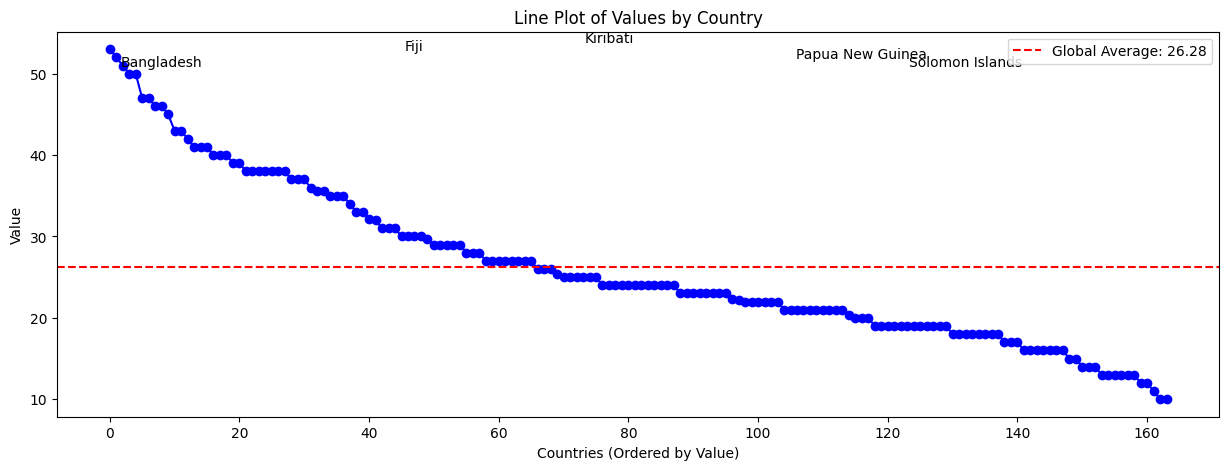

In [70]:
dv_pd.sort_values(by='Value', ascending=False, inplace=True)
global_avg = dv_pd['Value'].mean()
top_5_countries = dv_pd.head(5)

plt.figure(figsize=(15, 5))
plt.plot(range(len(dv_pd)), dv_pd['Value'], marker='o', linestyle='-', color='b')
plt.axhline(y=global_avg, color='r', linestyle='--', label=f'Global Average: {global_avg:.2f}')

for i, country in top_5_countries.iterrows():
    plt.annotate(country['Country Name'], (i, country['Value']), textcoords="offset points", xytext=(0, 5), ha='center')

plt.xlabel('Countries (Ordered by Value)')
plt.ylabel('Value')
plt.title('Line Plot of Values by Country')
plt.legend()
plt.show()

In [50]:
dv_pd_false = dv_pd.copy()
dv_pd_false['Value'] = dv_pd_false['Value'] - 10

In [51]:
dv_pd

,Country Name,Country Code,Value
0,Afghanistan,AFG,46.0
1,Albania,ALB,13.0
2,Angola,AGO,38.0
3,Argentina,ARG,27.0
4,Armenia,ARM,10.0
...,...,...,...
159,"Venezuela, RB",VEN,19.0
160,Vietnam,VNM,25.0
161,West Bank and Gaza,PSE,29.0
162,Zambia,ZMB,41.0


In [52]:
dv_pd.to_csv('./website/data/true/dv.csv', index=False)
dv_pd_false.to_csv('./website/data/false/dv.csv', index=False)

In [39]:
abortion_pd

,Region,% all pregancy ended in abortion,% unintended pregancy,% unintended ended in abortion
0,High income,20,46,43
1,Middle income,32,50,66
2,Upper-middle income,39,59,67
3,Lower-middle income,28,43,64
4,Low income,17,43,40


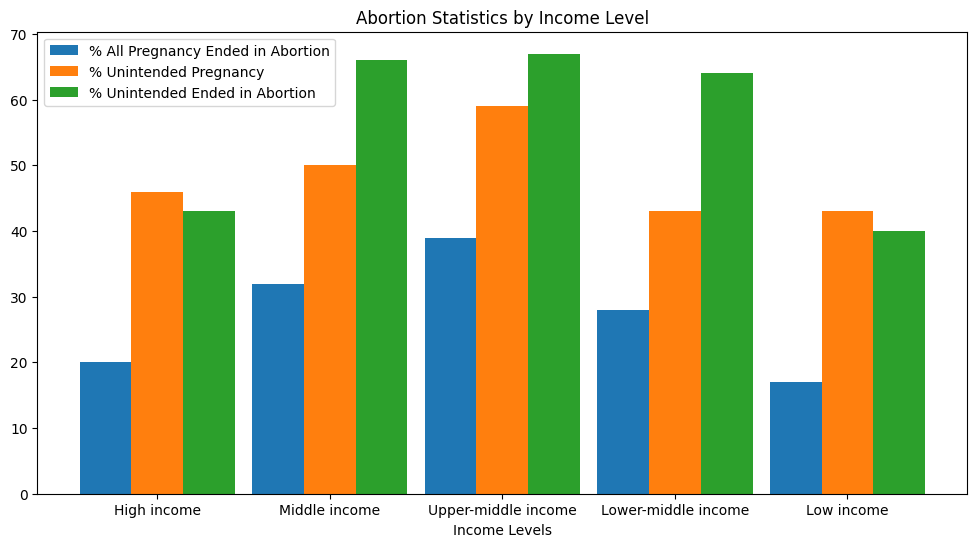

In [40]:
# Data from your DataFrame
income_levels = abortion_pd['Region']
all_pregnancy = abortion_pd['% all pregancy ended in abortion']
unintended_pregnancy = abortion_pd['% unintended pregancy']
unintended_ended = abortion_pd['% unintended ended in abortion']

# Setting up the positions
x = np.arange(len(income_levels))
width = 0.3

fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
bar1 = ax.bar(x - width, all_pregnancy, width, label='% All Pregnancy Ended in Abortion')
bar2 = ax.bar(x, unintended_pregnancy, width, label='% Unintended Pregnancy')
bar3 = ax.bar(x + width, unintended_ended, width, label='% Unintended Ended in Abortion')

# Adding labels, title and custom x-axis tick labels
ax.set_xlabel('Income Levels')
ax.set_title('Abortion Statistics by Income Level')
ax.set_xticks(x)
ax.set_xticklabels(income_levels)
ax.legend()

plt.show()

In [80]:
abortion_pd.to_csv('./website/data/true/abortion.csv', index=False)